In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 


In [7]:
image_size = 256
batch_size = 32

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "F:\\main\\potato project\\PlantVillage",
    shuffle = True,
    image_size = (image_size,image_size),
    batch_size = batch_size
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names 

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

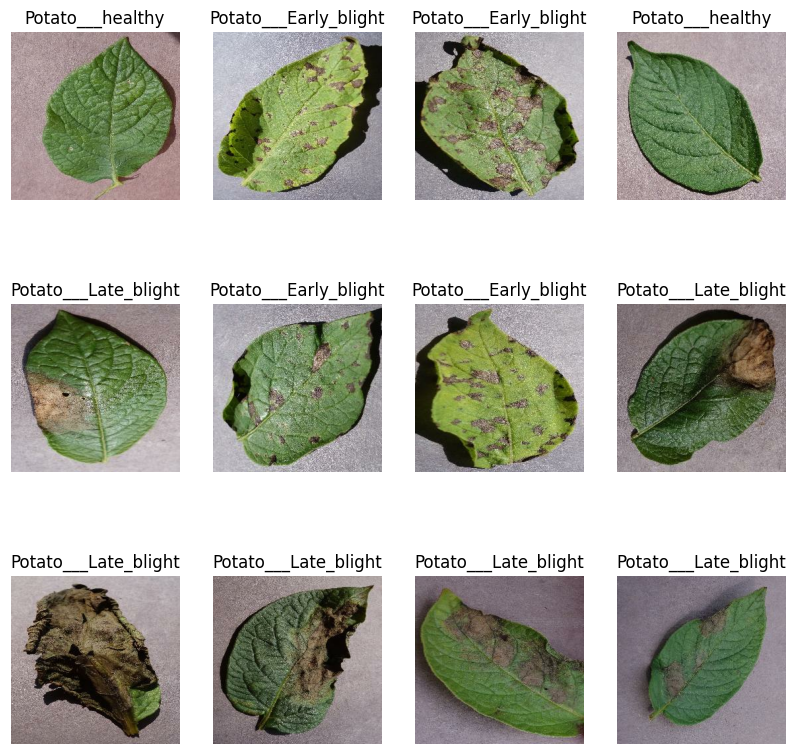

In [10]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
   for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [11]:
#split data into train and test

train_size = 0.8
len(dataset)*train_size



54.400000000000006

In [12]:
train_ds = dataset.take(54)
len(train_ds)

54

In [13]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [14]:
#validation dataset
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [15]:
val_ds =  test_ds.take(6)
len(val_ds)

6

In [16]:
test_ds = test_ds.skip(6)
len(test_ds)


8

In [21]:
#creating function fot train and test data 

def dataset_partition(ds, train_split =0.8, val_split=0.1,test_split=0.1,shuffle=True, shuffle_size=1000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12 )
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)


    return train_ds, val_ds, test_ds

In [22]:
train_ds, val_ds, test_ds = dataset_partition(dataset)

In [23]:
len(train_ds)

54

In [25]:
len(val_ds)

6

In [24]:
len(test_ds)

8